# 💥Heart Attack Prediction💥

The dataset consists of 70 000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

The task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results. 

#### Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 


***

# 1.1 Initial analysis
Let's look at the dataset and given variables.

## 1.2 Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os
df = pd.read_csv("./cardio_train.csv",sep=";")

from kmodes.kmodes import KModes

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 1.2 Cleaning Data

In [3]:
# General info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 decimal number (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field. We can use `describe()` to display sample statistics such as `min`, `max`, `mean`,`std` for each attribute:

In [4]:
# Are there any `NA`s or missing values in a dataset?
df.isnull().values.any()

False

## 1.2.2 Removing Outliers

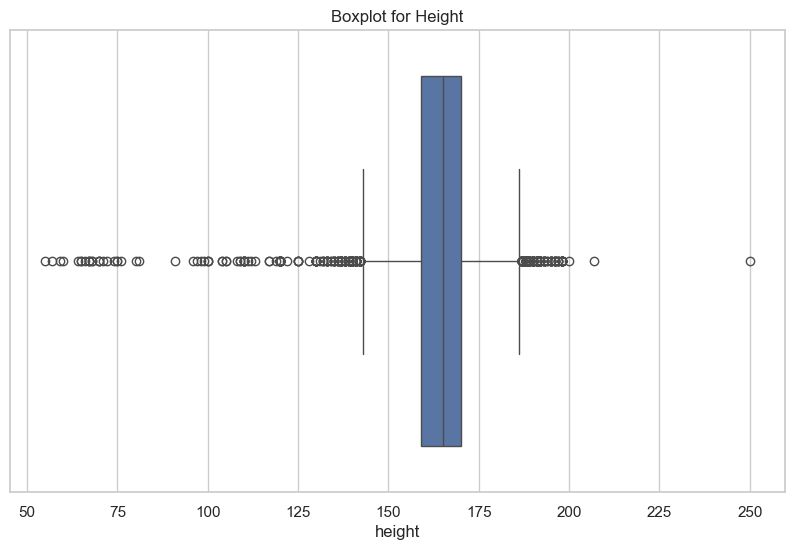

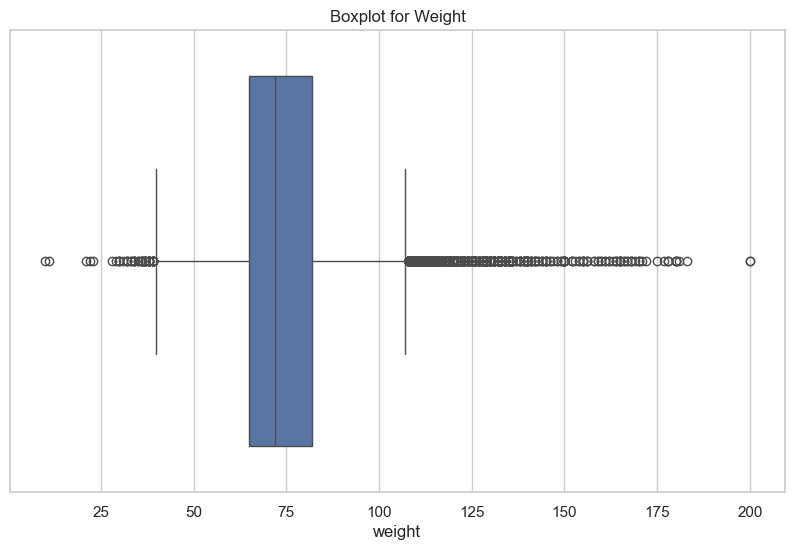

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but can enhance the appearance of the plots

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Optional, sets the style for seaborn

# Boxplot for "height"
plt.figure(figsize=(10, 6))  # Optional, set the figure size
sns.boxplot(x=df['height'])
plt.title('Boxplot for Height')
plt.show()

# Boxplot for "weight"
plt.figure(figsize=(10, 6))  # Optional, set the figure size
sns.boxplot(x=df['weight'])
plt.title('Boxplot for Weight')
plt.show()


In [6]:
#removing Outliers
# Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

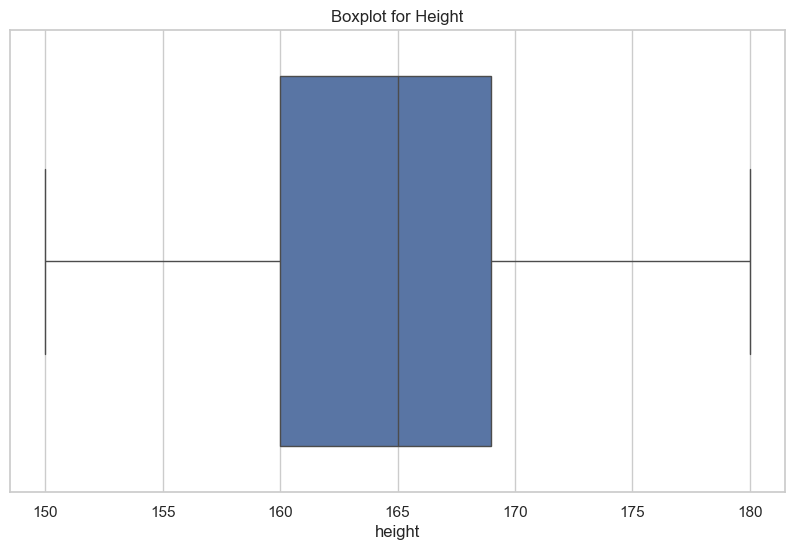

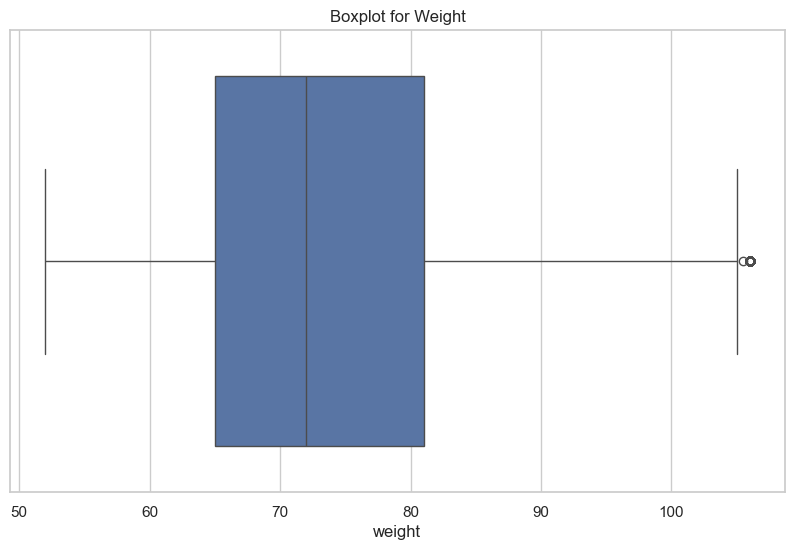

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but can enhance the appearance of the plots

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Optional, sets the style for seaborn

# Boxplot for "height"
plt.figure(figsize=(10, 6))  # Optional, set the figure size
sns.boxplot(x=df['height'])
plt.title('Boxplot for Height')
plt.show()

# Boxplot for "weight"
plt.figure(figsize=(10, 6))  # Optional, set the figure size
sns.boxplot(x=df['weight'])
plt.title('Boxplot for Weight')
plt.show()


In [8]:
#In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [9]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [10]:
#In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


In [11]:
#after removing outliers
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,49895.698065,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,28840.467755,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,0.000000,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24867.500000,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49902.500000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74745.750000,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> Outliers removed and data cleaned
</p></div>

***

# 1.3 Transforming Data

## 1.3.1 Transforming the column AGE(measured in days) for Age_Bin

In [12]:
# transforming the column AGE(measured in days) for Years
df['years'] = (df['age'] / 365).round().astype('int')
df.drop(['age'], axis='columns', inplace=True)
df.drop(['id'], axis='columns', inplace=True)



In [13]:
# age_bin in quinquenium 5 years spam
df['age_bin'] = pd.cut(df['years'], [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
                              labels=['0-20', '20-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])

## 1.3.2 Transforming the column bmi in Body Mass Index Classes (1 to 6)

In [14]:
# Adding Body Mass Index
df['bmi'] = df['weight']/((df['height']/100)**2)

In [15]:
# transforming the column bmi in Body Mass Index Classes (1 to 6)
rating = []
for row in df['bmi']:
    if row < 18.5 :    rating.append(1) #UnderWeight
    elif row > 18.5 and row  < 24.9:   rating.append(2)#NormalWeight
    elif row > 24.9 and row < 29.9:  rating.append(3)#OverWeight
    elif row > 29.9 and row < 34.9:  rating.append(4)#ClassObesity_1
    elif row > 34.9 and row < 39.9:  rating.append(5)#ClassObesity_2
    elif row > 39.9 and row < 49.9:  rating.append(6)#ClassObesity_3
    elif row > 49.9:  rating.append('Error')
        
    else:           rating.append('Not_Rated')

In [16]:
# inserting Column
df['BMI_Class'] = rating


In [17]:
# general distribuition
df["BMI_Class"].value_counts()

BMI_Class
3    23562
2    21768
4    10778
5     3356
6      551
1      127
Name: count, dtype: int64

## 1.3.3 Creating the column MAP

Mean Arterial Pressure (MAP) = 2 Diastollic Blood Pressure + Sistolic Blood Pressure / 3

The overall blood pressure as measured in the brachial artery is maintained by the cardiac output and the total peripheral resistance (TPR) to flow. The mean arterial pressure (MAP) is calculated by the formula:


In [18]:
# creating a Column for MAP
df['MAP'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

In [19]:
#Creating Classes for MAP
map_values = []
for row in df['MAP']:
    if row < 69.9:    map_values.append(1) #Low
    elif row > 70 and row  < 79.9:   map_values.append(2)#Normal
    elif row > 79.9 and row < 89.9:  map_values.append(3)#Normal
    elif row > 89.9 and row < 99.9:  map_values.append(4)#Normal
    elif row > 99.9 and row < 109.9:  map_values.append(5)#High
    elif row > 109.9 and row < 119.9:  map_values.append(6)#High
    elif row > 119.9:  map_values.append(7)#High
    
        
    else:           map_values.append('Not_Rated')

In [20]:
#inserting MAP_Class Column
df['MAP_Class'] = map_values

## 1.4 Reordering Columns

In [21]:
# Reordering Columns
df= df[["gender","height","weight","bmi","ap_hi","ap_lo","MAP","years","age_bin","BMI_Class","MAP_Class","cholesterol","gluc","smoke","active","cardio"]]
df.head()

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,years,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,50,45-50,2,4,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,55,50-55,5,5,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,52,50-55,2,4,3,1,0,0,1
3,2,169,82.0,28.710479,150,100,116.666667,48,45-50,3,6,1,1,0,1,1
4,1,156,56.0,23.011177,100,60,73.333333,48,45-50,2,2,1,1,0,0,0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> Columns MAP_Class, BMI_Class, years and age_bin added
</p></div>

***

# 2.1 Data Analize and Preparation

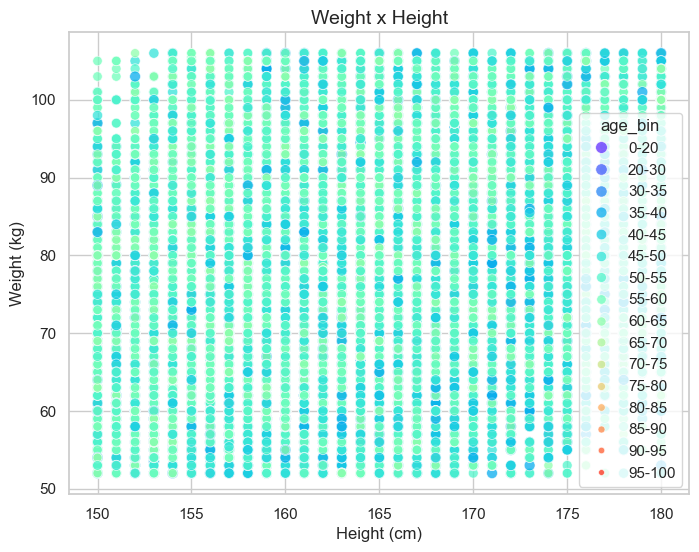

In [22]:
# sets plot size
plt.figure(figsize=(8,6))

# plots scatterplot
sns.scatterplot(x='height', y='weight', data=df, hue='age_bin', palette='rainbow', size='age_bin', alpha=0.75)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Height", fontsize=14)

# displays the plot
plt.show()

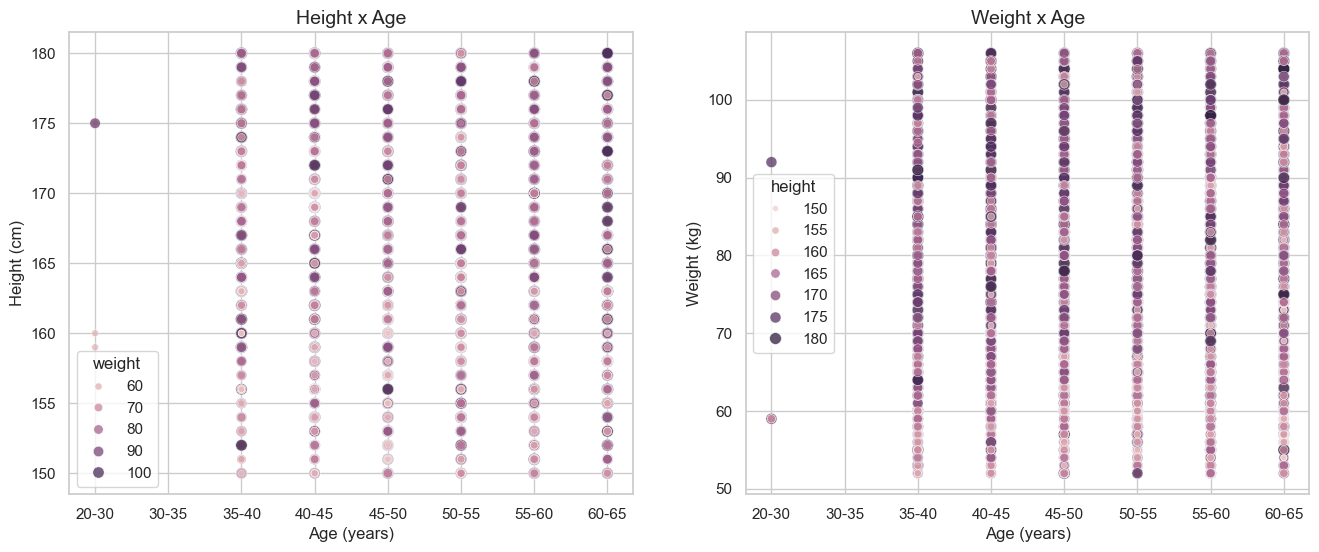

In [23]:
# sets plot size
plt.figure(figsize=(16,6))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age_bin', y='height', data=df, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.title("Height x Age", fontsize=14)

# plots scatterplot
plt.subplot(1,2,2)
sns.scatterplot(x='age_bin', y='weight', data=df, hue='height', size='height', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Age", fontsize=14)

# displays the plot
plt.show()

In [24]:
# only Categorical Data Columns DataFrame
df_cat = df[["gender","age_bin","BMI_Class","MAP_Class","cholesterol","gluc","smoke","active","cardio",]]

In [25]:
df_cat.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,2,45-50,2,4,1,1,0,1,0
1,1,50-55,5,5,3,1,0,1,1
2,1,50-55,2,4,3,1,0,0,1
3,2,45-50,3,6,1,1,0,1,1
4,1,45-50,2,2,1,1,0,0,0


In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
3,1,3,2,4,0,0,0,1,1
4,0,3,1,0,0,0,0,0,0


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Function to apply label encoding to categorical columns and get mappings
def label_encode_columns(df):
    label_encoders = {}
    encoded_df = df.copy()

    for column in df.columns:
        le = LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))

    return encoded_df, label_encoders

# Apply label encoding
encoded_df, label_encoders = label_encode_columns(df_cat)

# Display the mapping for each column
print("\nMapping for each column:")
for column, mapping in label_encoders.items():
    print(f"{column}: {mapping}")



Mapping for each column:
gender: {0: 0, 1: 1}
age_bin: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
BMI_Class: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
MAP_Class: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
cholesterol: {0: 0, 1: 1, 2: 2}
gluc: {0: 0, 1: 1, 2: 2}
smoke: {0: 0, 1: 1}
active: {0: 0, 1: 1}
cardio: {0: 0, 1: 1}


In [28]:
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")
df_male.head()


,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
4,0,3,1,0,0,0,0,0,0
5,0,5,2,2,1,1,0,0,0
6,0,6,4,2,2,0,0,1,0


In [29]:
df_female.head()


,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
3,1,3,2,4,0,0,0,1,1
7,1,6,3,3,2,2,0,1,1
11,1,4,1,2,0,0,0,1,0
12,1,2,1,2,0,0,0,0,0


## 2.2 MAP Classes

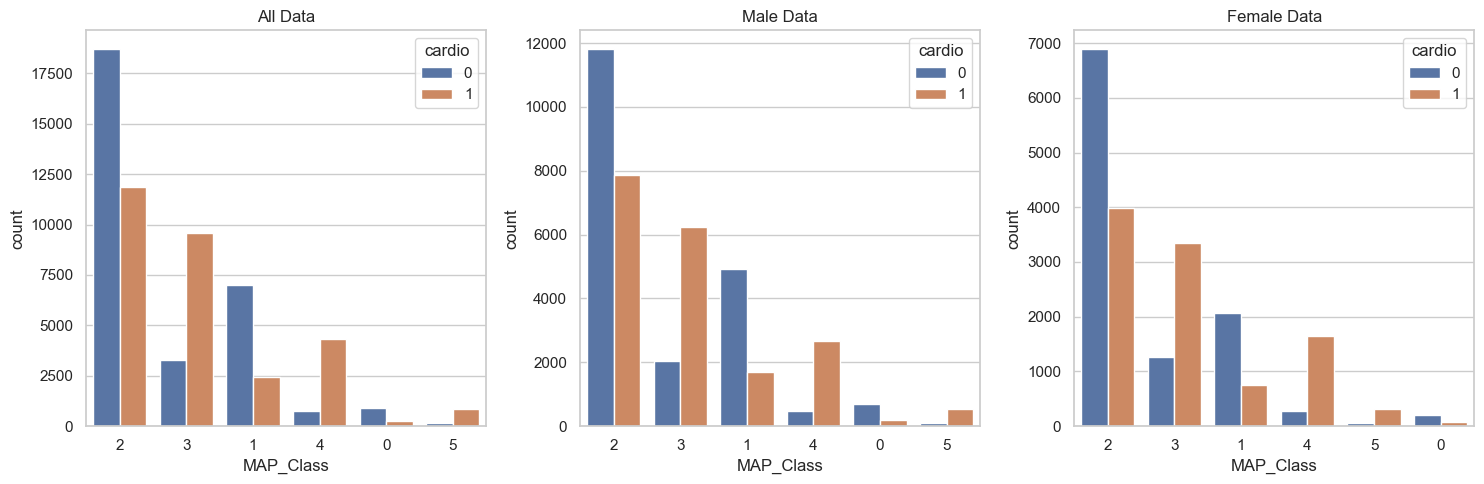

In [30]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['MAP_Class'],order=df_cat['MAP_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['MAP_Class'],order=df_male['MAP_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['MAP_Class'],order=df_female['MAP_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> All the values are similar
</p></div>

## 2.3 BMI Classes

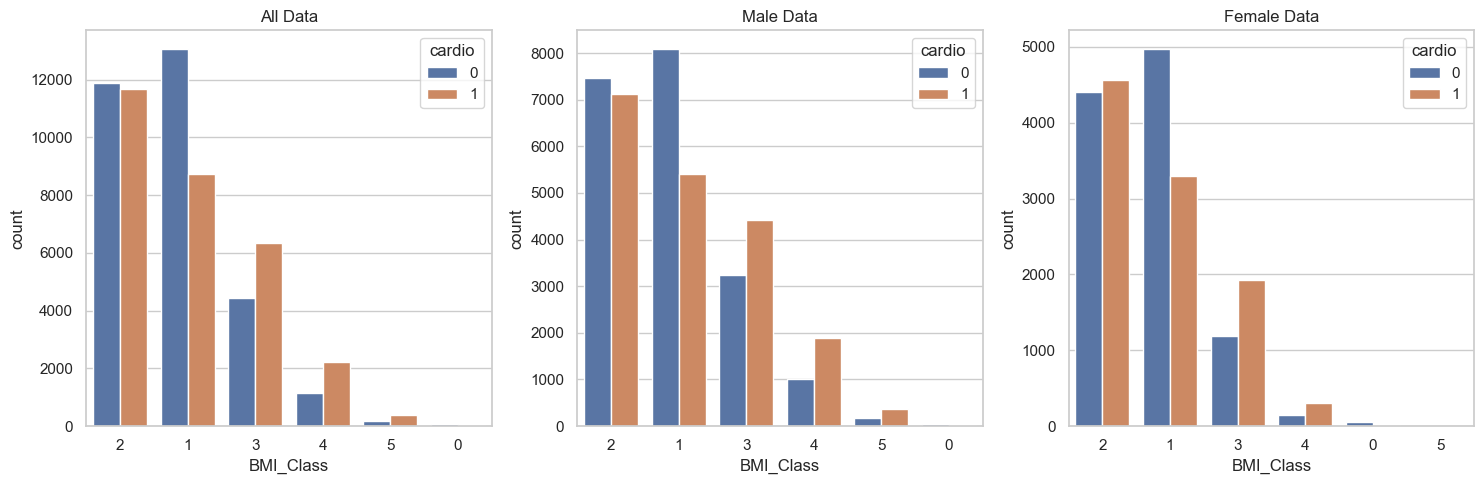

In [31]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['BMI_Class'],order=df_cat['BMI_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['BMI_Class'],order=df_male['BMI_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['BMI_Class'],order=df_female['BMI_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> The BMI Classes for All data, Male and Female are very similar BUT the BMI_Class = 2 for Female data is slightly different
</p></div>

## 2.4 Glucose

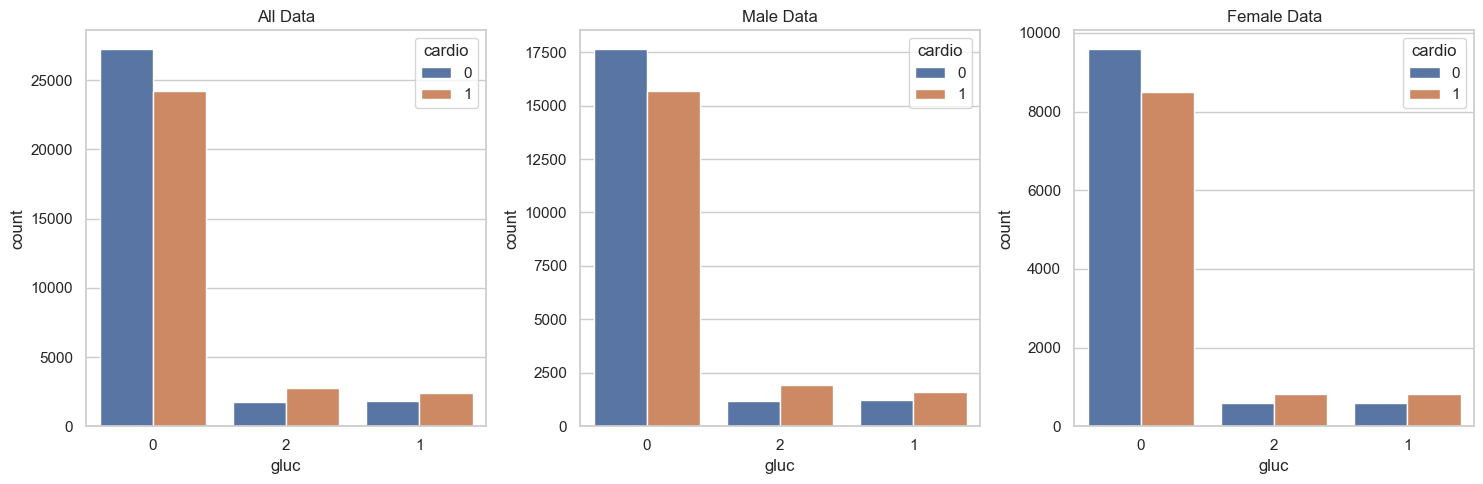

In [32]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['gluc'],order=df_cat['gluc'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['gluc'],order=df_male['gluc'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['gluc'],order=df_female['gluc'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> All the values are similar
</p></div>

## 2.5 Cholesterol

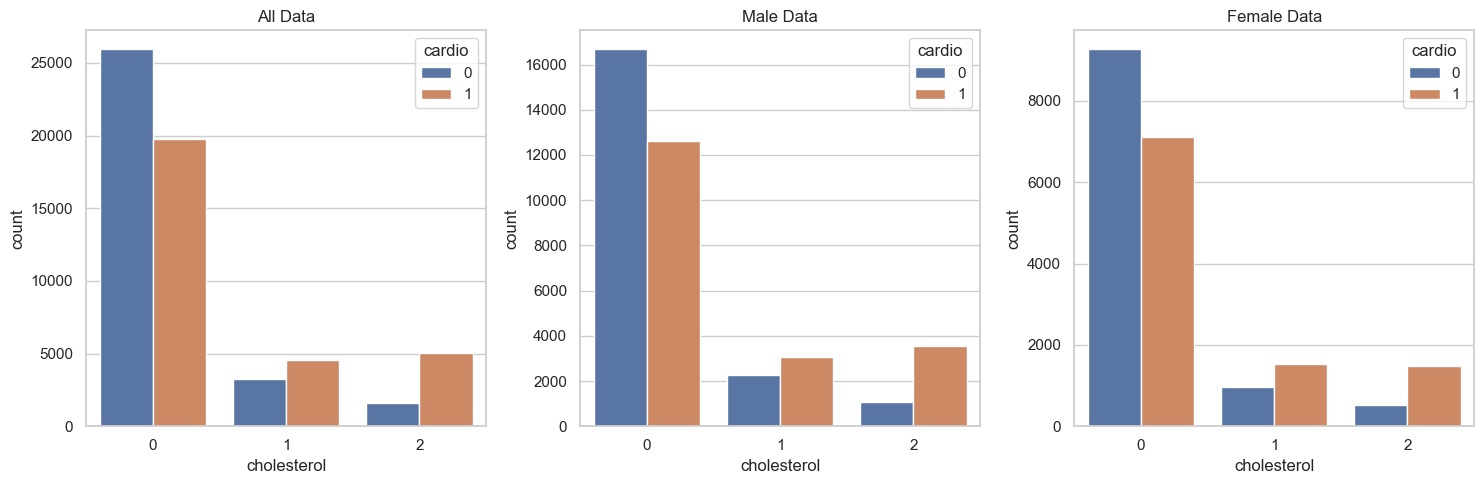

In [33]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['cholesterol'],order=df_cat['cholesterol'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['cholesterol'],order=df_male['cholesterol'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['cholesterol'],order=df_female['cholesterol'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> All the values are similar
</p></div>

## 2.6 Smoke

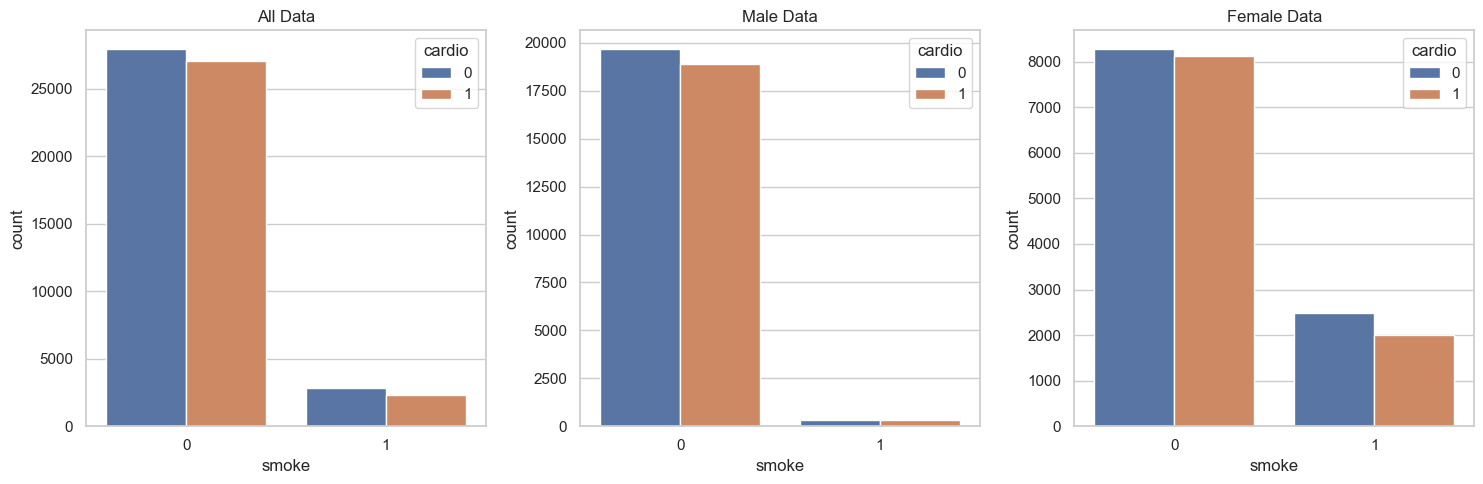

In [34]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['smoke'],order=df_cat['smoke'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['smoke'],order=df_male['smoke'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['smoke'],order=df_female['smoke'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> The value is high for Female data when smoke is 1
</p></div>

## 2.7 Active



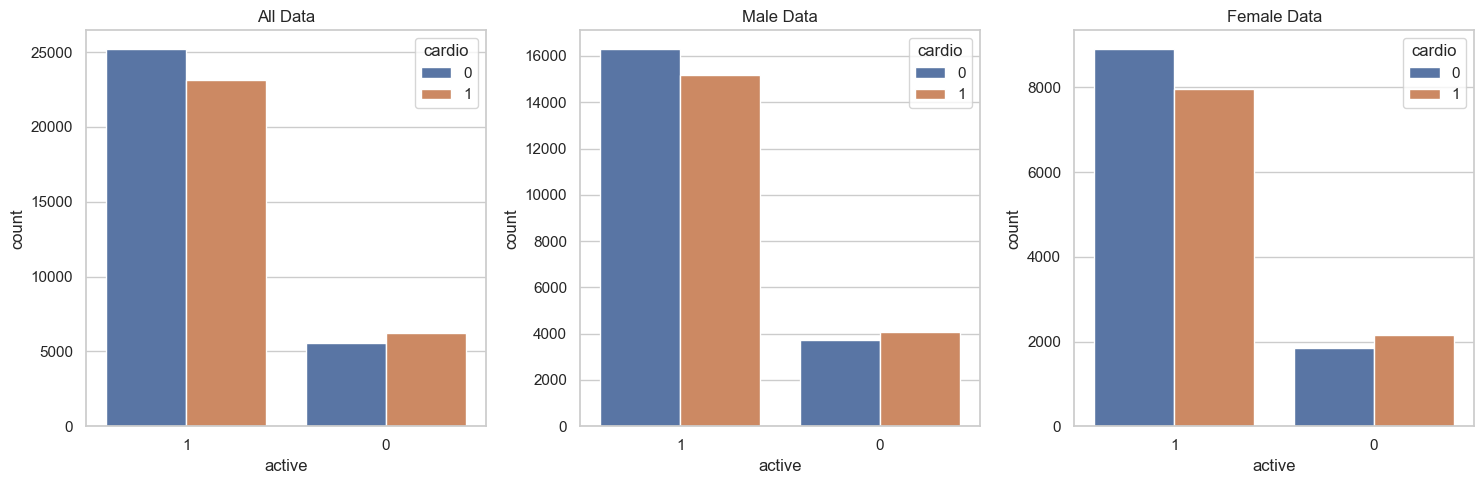

In [35]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['active'],order=df_cat['active'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['active'],order=df_male['active'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['active'],order=df_female['active'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> All the values are similar
</p></div>

## 2.8 Age


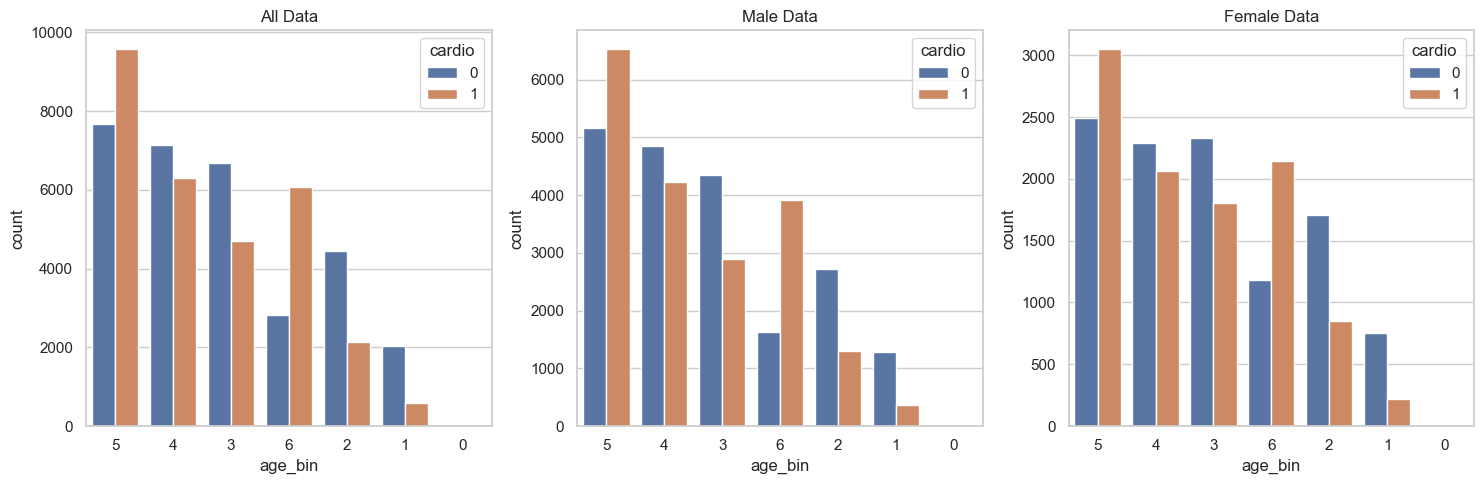

In [266]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['age_bin'],order=df_cat['age_bin'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['age_bin'],order=df_male['age_bin'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['age_bin'],order=df_female['age_bin'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> The datas are similar BUT in age_bin 6 (45-50 years) the values are very different 
    </p></div>

***

# 3.1 KModes Analisys




In [37]:
# new df to work
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")

In [38]:
df_male.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
4,0,3,1,0,0,0,0,0,0
5,0,5,2,2,1,1,0,0,0
6,0,6,4,2,2,0,0,1,0


In [39]:
df_female.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
3,1,3,2,4,0,0,0,1,1
7,1,6,3,3,2,2,0,1,1
11,1,4,1,2,0,0,0,1,0
12,1,2,1,2,0,0,0,0,0


## 3.2 Elbow Curve Method

### 3.2.1 For All Data

In [40]:
df_cat.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
3,1,3,2,4,0,0,0,1,1
4,0,3,1,0,0,0,0,0,0


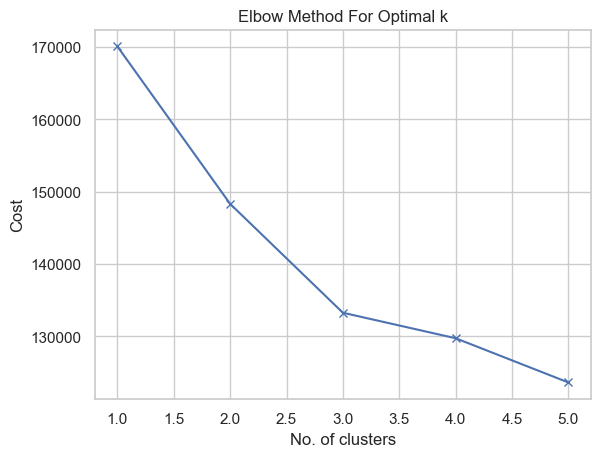

In [467]:
# Elbow curve to find optimal K in Huang init
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(df_cat.drop(axis=1,columns='cardio'))
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### 3.2.2 For Male Data

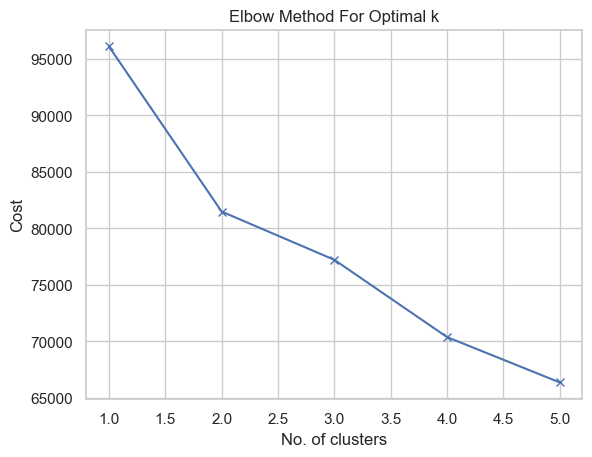

In [468]:
# Elbow curve to find optimal K in Huang
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(df_male.drop(axis=1,columns='cardio'))
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

**The best number os clusters for male Data in Huang Init is 2**

### 3.2.3 For Female Data

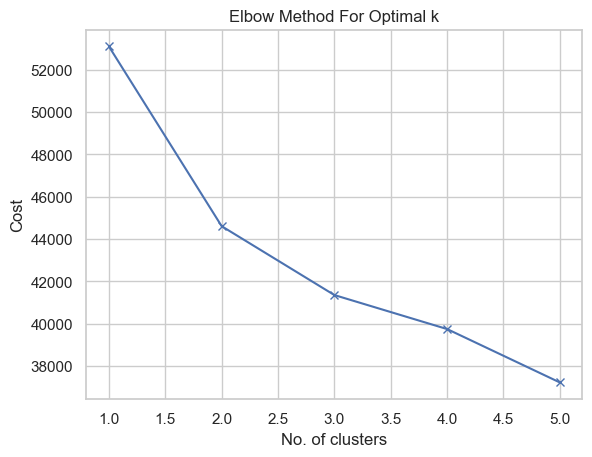

In [469]:
# Elbow curve to find optimal K
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(df_female.drop(axis=1,columns='cardio'))
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

**The best number of clusters for female data is 2**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> The best number of Clusters for All Data, Male and Female Data is 2 Clusters
</p></div>

## 2.3.1 Building a KModes for Data



In [41]:
# female data
# Building the model with using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_1 = km_huang.fit_predict(df_female.drop(axis=1,columns='cardio'))
clusters_huang_1

array([1, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [ ]:
import joblib
joblib.dump(km_huang, 'kmodes_model_female.joblib')


In [42]:
# male data
# Building the model with using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_2 = km_huang.fit_predict(df_male.drop(axis=1,columns='cardio'))
clusters_huang_2

array([0, 0, 1, ..., 0, 0, 0], dtype=uint16)

In [473]:
joblib.dump(km_huang, 'kmodes_model_male.joblib')


## 2.3.2 Inserting clusters in DataFrame

In [43]:
df_female.insert(0,"Cluster", clusters_huang_1, True)

# female DataFrame with Clusters
df_female.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,1,3,1,2,0,0,0,1,0
3,0,1,3,2,4,0,0,0,1,1
7,0,1,6,3,3,2,2,0,1,1
11,1,1,4,1,2,0,0,0,1,0
12,1,1,2,1,2,0,0,0,0,0


In [44]:
df_male.insert(0, "Cluster", clusters_huang_2, True)

# female DataFrame with Clusters
df_male.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,0,0,4,4,3,2,0,0,1,1
2,0,0,4,1,2,2,0,0,0,1
4,1,0,3,1,0,0,0,0,0,0
5,0,0,5,2,2,1,1,0,0,0
6,0,0,6,4,2,2,0,0,1,0


In [45]:
# replacing cluster column values to merge dataframes after
df_male["Cluster"].replace({0:2, 1:3}, inplace=True)
df_male.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,2,0,4,4,3,2,0,0,1,1
2,2,0,4,1,2,2,0,0,0,1
4,3,0,3,1,0,0,0,0,0,0
5,2,0,5,2,2,1,1,0,0,0
6,2,0,6,4,2,2,0,0,1,0


In [46]:
# merging female and male data
df_clusters = pd.concat([df_female, df_male], ignore_index=True, sort=False)
df_clusters.head(10)

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,1,3,1,2,0,0,0,1,0
1,0,1,3,2,4,0,0,0,1,1
2,0,1,6,3,3,2,2,0,1,1
3,1,1,4,1,2,0,0,0,1,0
4,1,1,2,1,2,0,0,0,0,0
5,1,1,5,1,1,0,0,1,1,0
6,0,1,4,3,2,0,0,0,1,0
7,1,1,1,1,2,0,0,0,1,0
8,0,1,5,2,2,0,2,0,0,0
9,0,1,5,2,3,2,0,0,0,1


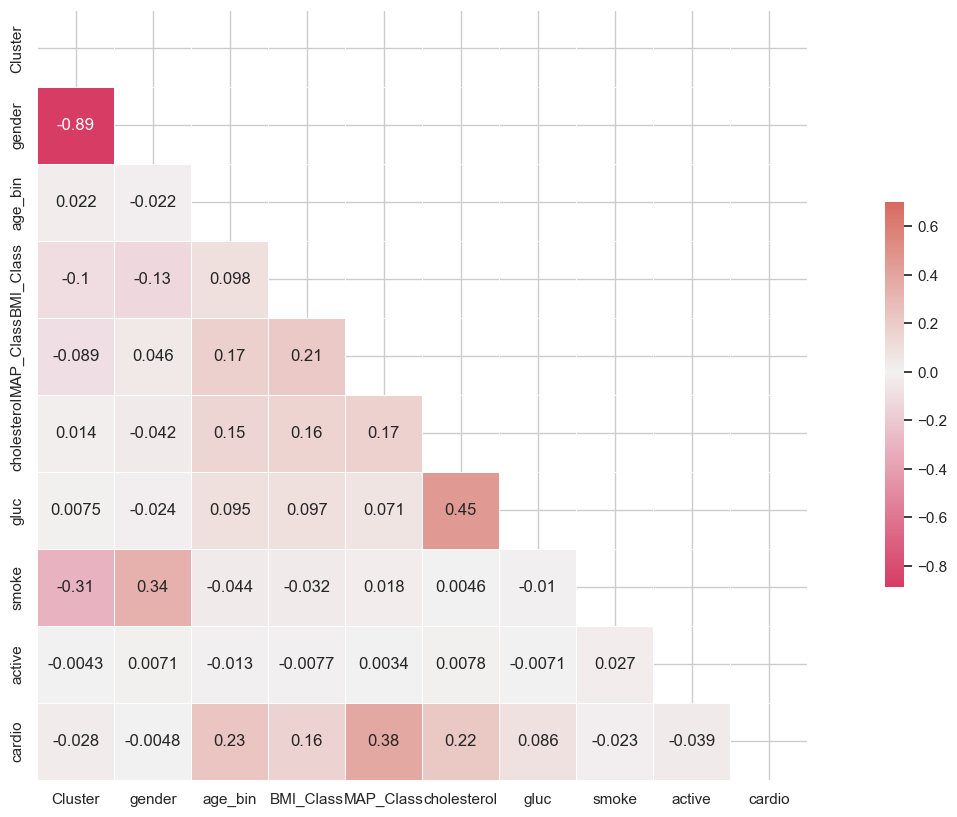

In [47]:
corr = df_clusters.corr()
cmap = sns.diverging_palette(2, 15, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2.4 Analizing Clusters



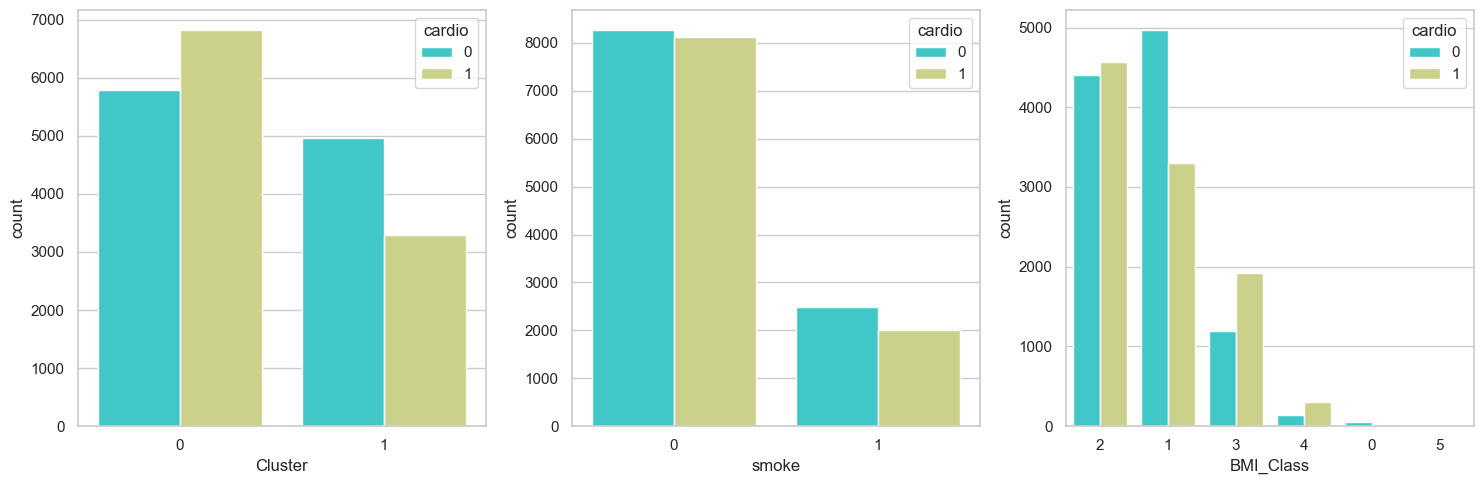

In [479]:
# female
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_female['Cluster'],order=df_female['Cluster'].value_counts().index,hue=df_female['cardio'],ax=axs[0],palette='rainbow')
sns.countplot(x=df_female['smoke'],order=df_female['smoke'].value_counts().index,hue=df_female['cardio'],ax=axs[1],palette='rainbow')
sns.countplot(x=df_female['BMI_Class'],order=df_female['BMI_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2],palette='rainbow')

plt.tight_layout()
plt.show()

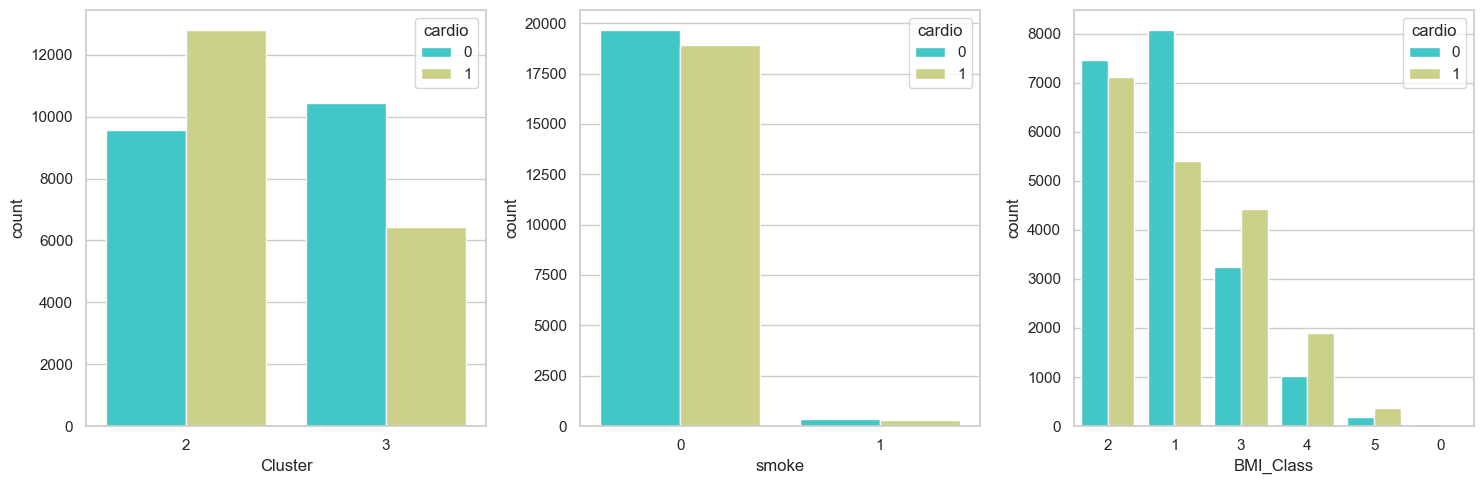

In [480]:
# male
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_male['Cluster'],order=df_male['Cluster'].value_counts().index,hue=df_male['cardio'],ax=axs[0],palette='rainbow')
sns.countplot(x=df_male['smoke'],order=df_male['smoke'].value_counts().index,hue=df_male['cardio'],ax=axs[1],palette='rainbow')
sns.countplot(x=df_male['BMI_Class'],order=df_male['BMI_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[2],palette='rainbow')

plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> There are notably difference between clusters
</p></div>

### 2.4.1 For Female Data

In [481]:
# separating clusters
df_female_c0 = df_female[df_female["Cluster"] == 0]
df_female_c1 = df_female[df_female["Cluster"] == 1]


df_female_c0.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
3,0,1,3,2,4,0,0,0,1,1
7,0,1,6,3,3,2,2,0,1,1
20,0,1,4,3,2,0,0,0,1,0
29,0,1,5,2,2,0,2,0,0,0
34,0,1,5,2,3,2,0,0,0,1


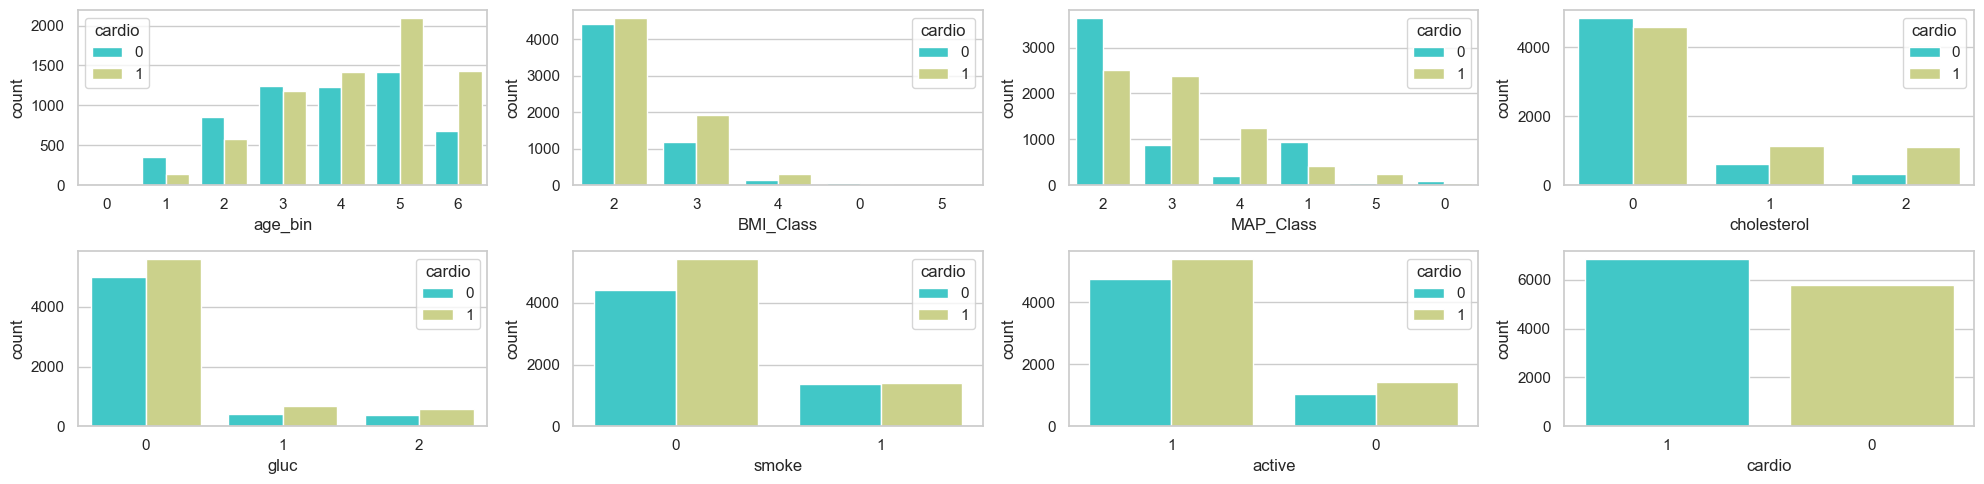

In [482]:
# for df_female_c0
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_female_c0['age_bin'],hue=df_female_c0['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_female_c0['BMI_Class'],order=df_female_c0['BMI_Class'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_female_c0['MAP_Class'],order=df_female_c0['MAP_Class'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_female_c0['cholesterol'],order=df_female_c0['cholesterol'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_female_c0['gluc'],order=df_female_c0['gluc'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_female_c0['smoke'],order=df_female_c0['smoke'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_female_c0['active'],order=df_female_c0['active'].value_counts().index,hue=df_female_c0['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_female_c0['cardio'],order=df_female_c0['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()


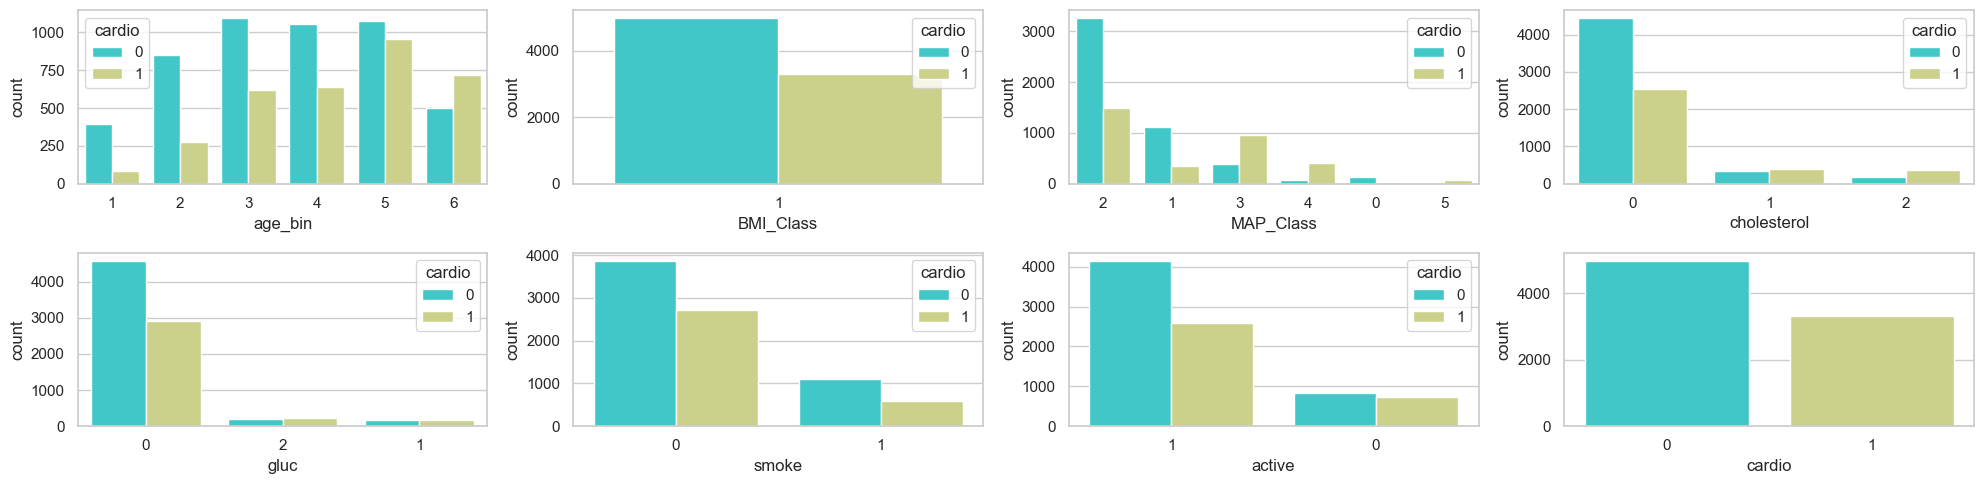

In [483]:
# for df_female_c1
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_female_c1['age_bin'],hue=df_female_c1['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_female_c1['BMI_Class'],order=df_female_c1['BMI_Class'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_female_c1['MAP_Class'],order=df_female_c1['MAP_Class'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_female_c1['cholesterol'],order=df_female_c1['cholesterol'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_female_c1['gluc'],order=df_female_c1['gluc'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_female_c1['smoke'],order=df_female_c1['smoke'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_female_c1['active'],order=df_female_c1['active'].value_counts().index,hue=df_female_c1['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_female_c1['cardio'],order=df_female_c1['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> BMI_Class, Smoke and Age_Bin are very different within female clusters
</p></div>

### 2.4.2For Male Data

In [484]:
# separating clusters
df_male_c2 = df_male[df_male["Cluster"] == 2]
df_male_c3 = df_male[df_male["Cluster"] == 3]


df_male_c2.describe()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
count,22385.0,22385.0,22385.000000,22385.000000,22385.000000,22385.000000,22385.000000,22385.000000,22385.000000,22385.000000
mean,2.0,0.0,4.266518,2.339602,2.407371,0.444047,0.255886,0.017646,0.805361,0.572258
std,0.0,0.0,1.367216,0.843932,1.042867,0.733045,0.603935,0.131663,0.395932,0.494762
min,2.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,0.0,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.0,0.0,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2.0,0.0,5.000000,3.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.0,0.0,6.000000,5.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000


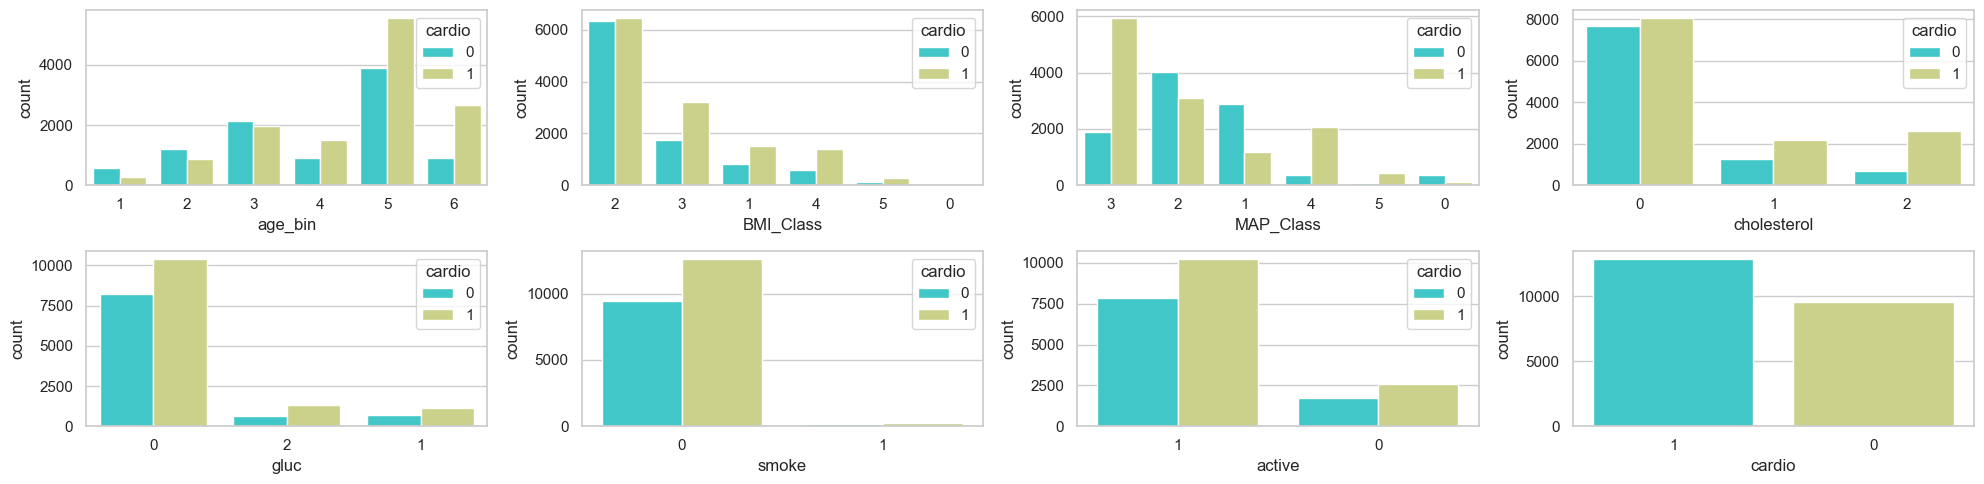

In [485]:
# for df_male_c2
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_male_c2['age_bin'],hue=df_male_c2['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_male_c2['BMI_Class'],order=df_male_c2['BMI_Class'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_male_c2['MAP_Class'],order=df_male_c2['MAP_Class'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_male_c2['cholesterol'],order=df_male_c2['cholesterol'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_male_c2['gluc'],order=df_male_c2['gluc'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_male_c2['smoke'],order=df_male_c2['smoke'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_male_c2['active'],order=df_male_c2['active'].value_counts().index,hue=df_male_c2['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_male_c2['cardio'],order=df_male_c2['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()

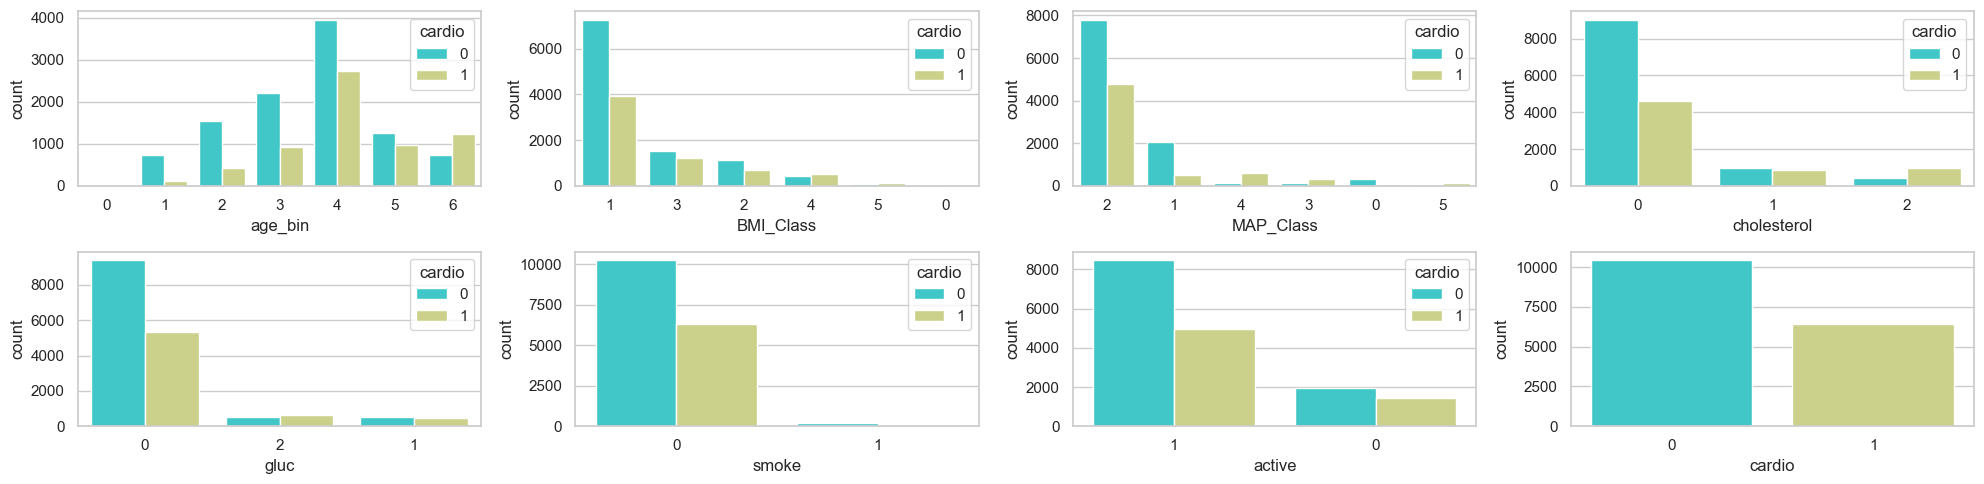

In [486]:
# for df_male_c3
f, axs = plt.subplots(2,4,figsize = (20,5))
sns.countplot(x=df_male_c3['age_bin'],hue=df_male_c3['cardio'],ax=axs[0,0],palette='rainbow')
sns.countplot(x=df_male_c3['BMI_Class'],order=df_male_c3['BMI_Class'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[0,1],palette='rainbow')
sns.countplot(x=df_male_c3['MAP_Class'],order=df_male_c3['MAP_Class'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[0,2],palette='rainbow')
sns.countplot(x=df_male_c3['cholesterol'],order=df_male_c3['cholesterol'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[0,3],palette='rainbow')
sns.countplot(x=df_male_c3['gluc'],order=df_male_c3['gluc'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[1,0],palette='rainbow')
sns.countplot(x=df_male_c3['smoke'],order=df_male_c3['smoke'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[1,1],palette='rainbow')
sns.countplot(x=df_male_c3['active'],order=df_male_c3['active'].value_counts().index,hue=df_male_c3['cardio'],ax=axs[1,2],palette='rainbow')
sns.countplot(x=df_male_c3['cardio'],order=df_male_c3['cardio'].value_counts().index,ax=axs[1,3],palette='rainbow')

plt.tight_layout()
plt.show()

# 3.1 Machine Learning

## 3.2 Preprocessing

In [48]:
# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.naive_bayes import GaussianNB

In [49]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60142 entries, 0 to 60141
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cluster      60142 non-null  uint16
 1   gender       60142 non-null  int64 
 2   age_bin      60142 non-null  int32 
 3   BMI_Class    60142 non-null  int64 
 4   MAP_Class    60142 non-null  int64 
 5   cholesterol  60142 non-null  int64 
 6   gluc         60142 non-null  int64 
 7   smoke        60142 non-null  int64 
 8   active       60142 non-null  int64 
 9   cardio       60142 non-null  int64 
dtypes: int32(1), int64(8), uint16(1)
memory usage: 4.0 MB


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_ml = df_clusters.apply(le.fit_transform)
df_ml.describe()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.00000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,1.675451,0.347311,4.042233,1.95213,2.237638,0.350953,0.220229,0.085631,0.803648,0.488228
std,1.050670,0.476120,1.377070,0.92357,0.938629,0.670076,0.567607,0.279820,0.397241,0.499866
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,1.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,0.000000,4.000000,2.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,5.000000,2.00000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,6.000000,5.00000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [51]:
target_name = 'cardio'
data_target = df_clusters[target_name]
data = df_clusters.drop([target_name], axis=1)

In [52]:
#separate into 30/70%
train, test, target, target_test = train_test_split(data, data_target, test_size=0.3, random_state=0)

In [53]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.3, random_state=0)

## 3.3 Naive Bayes

In machine learning, Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

Thanks to https://www.kaggle.com/vbmokin/20-models-for-cardiovascular-disease-prediction

In [513]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

68.6

In [514]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

68.59

In [515]:
diff_gaussian = acc_gaussian - acc_test_gaussian
diff_gaussian

0.009999999999990905

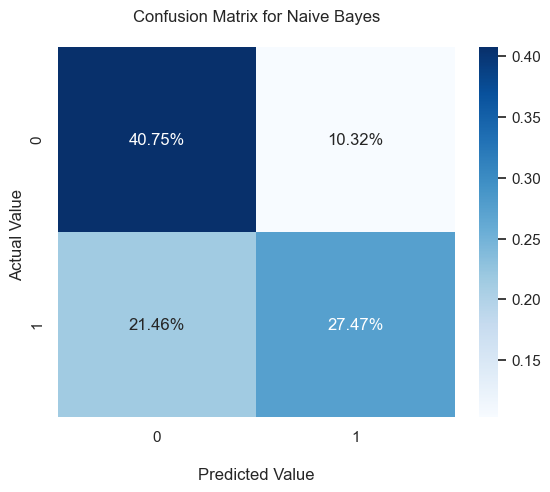

In [516]:
y_pred_gauss = gaussian.predict(Xval)

#Get the confusion matrix 
cf_matrix = confusion_matrix(Zval, y_pred_gauss)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes\n')
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [517]:
print(classification_report(Zval, y_pred_gauss))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      6450
           1       0.73      0.56      0.63      6180

    accuracy                           0.68     12630
   macro avg       0.69      0.68      0.68     12630
weighted avg       0.69      0.68      0.68     12630



## 3.4 Decision Tree Classifier

In [518]:
from sklearn.tree import DecisionTreeClassifier


In [519]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

73.84

In [520]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

70.45

In [521]:
diff_decision_tree = acc_decision_tree - acc_test_decision_tree
diff_decision_tree

3.3900000000000006

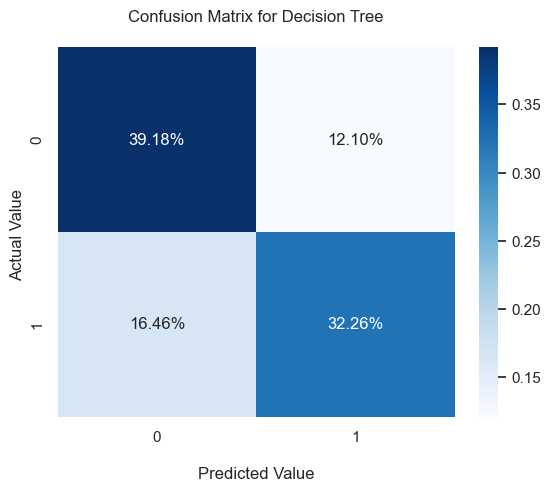

In [522]:
y_pred_dt = random_forest.predict(test)

#Get the confusion matrix 
cf_matrix = confusion_matrix(target_test, y_pred_dt)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree\n')
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ')
## Display the visualization of the Confusion Matrix.
plt.show()

## 3.5 Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [55]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

73.84 {'n_estimators': 300}


In [526]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

71.02

In [527]:
diff_random_forest = acc_random_forest - acc_test_random_forest
diff_random_forest

2.8200000000000074

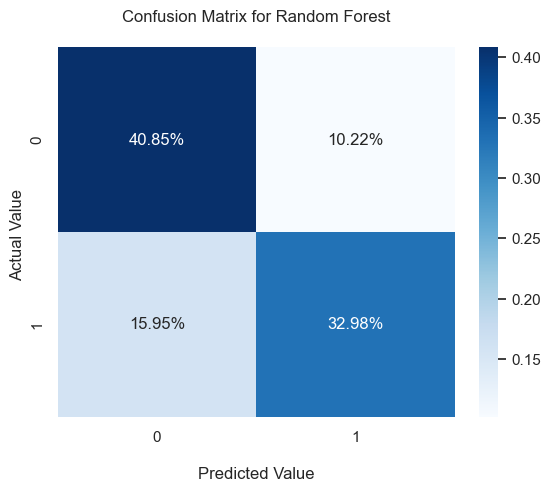

In [528]:
y_pred_df = random_forest.predict(Xval)

#Get the confusion matrix 
cf_matrix = confusion_matrix(Zval, y_pred_df)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n')
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ')

## Display the visualization of the Confusion Matrix.
plt.show()

In [529]:
print(classification_report(Zval, y_pred_df))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6450
           1       0.76      0.67      0.72      6180

    accuracy                           0.74     12630
   macro avg       0.74      0.74      0.74     12630
weighted avg       0.74      0.74      0.74     12630



## 3.5 Logistic Regression

In [530]:
from sklearn.linear_model import LogisticRegression

In [531]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

71.08

In [532]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

71.09

In [533]:
diff_log = acc_log - acc_test_log
diff_log

-0.010000000000005116

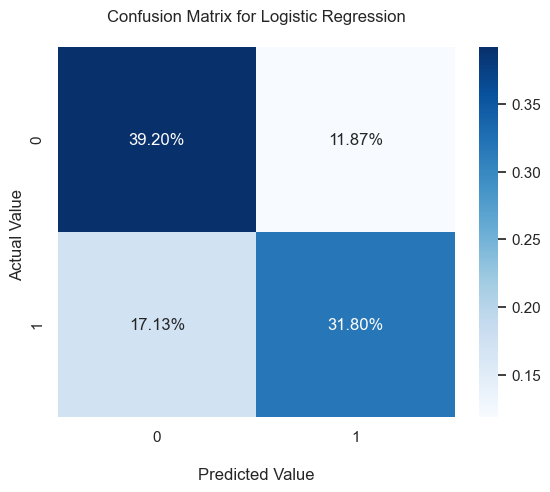

In [534]:
y_pred_lr = logreg.predict(Xval)

#Get the confusion matrix 
cf_matrix = confusion_matrix(Zval, y_pred_lr)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [535]:
print(classification_report(Zval, y_pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6450
           1       0.73      0.65      0.69      6180

    accuracy                           0.71     12630
   macro avg       0.71      0.71      0.71     12630
weighted avg       0.71      0.71      0.71     12630



# 5. Results for Machine Learning Algorithms



In [536]:
# printing the results
print("precision for Naive Bayes is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_gaussian,diff_gaussian))
print("precision for Decision Tree is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_decision_tree,diff_decision_tree))
print("precision for Random Forest is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_random_forest,diff_random_forest))
print("precision for Logistic Regression is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_log,diff_log))

precision for Naive Bayes is 68.59% and difference for test and training was 0.01
precision for Decision Tree is 70.45% and difference for test and training was 3.39
precision for Random Forest is 71.02% and difference for test and training was 2.82
precision for Logistic Regression is 71.09% and difference for test and training was -0.01


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2792a5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;"> According to the algorithms used, the Random Forest was the most accurate to classify the data. 
</p></div>

# 6. Fine Tune Random Forest


### Original Model

In [538]:
rf=RandomForestClassifier(n_estimators= 300)
rf.fit(train, target)
acc_random_forest = round(a.score(train, target) * 100, 2)
print(acc_random_forest)

72.34


### Evaluate on test Data

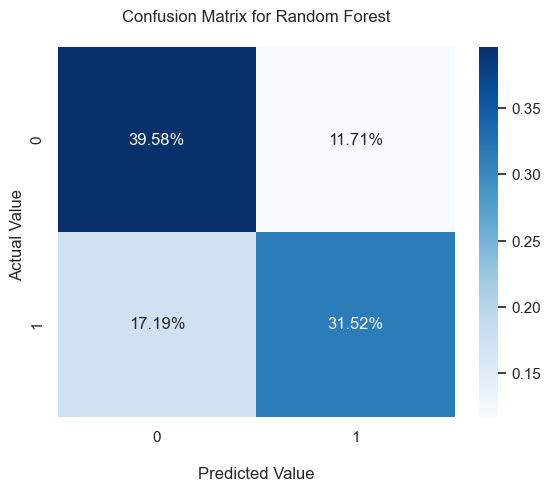

In [539]:
y_pred_df = rf.predict(test)

#Get the confusion matrix 
cf_matrix = confusion_matrix(target_test, y_pred_df)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n')
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ')

## Display the visualization of the Confusion Matrix.
plt.show()

### Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                # Method for sampling data points (with or without replacement)
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(train, target)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", round(grid_search.best_score_ * 100, 2))

# Evaluate the model on the test set
test_accuracy = grid_search.best_estimator_.score(Xval, Zval)
print("Test Accuracy:", round(test_accuracy * 100, 2))


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 71.8
Test Accuracy: 72.36


### Best Model

In [64]:
best=RandomForestClassifier(bootstrap=True, max_depth= 10, max_features='sqrt',min_samples_leaf= 4, min_samples_split= 10, n_estimators= 300)
best.fit(train, target)
acc_random_forest = round(best.score(train, target) * 100, 2)
print(acc_random_forest)

72.41


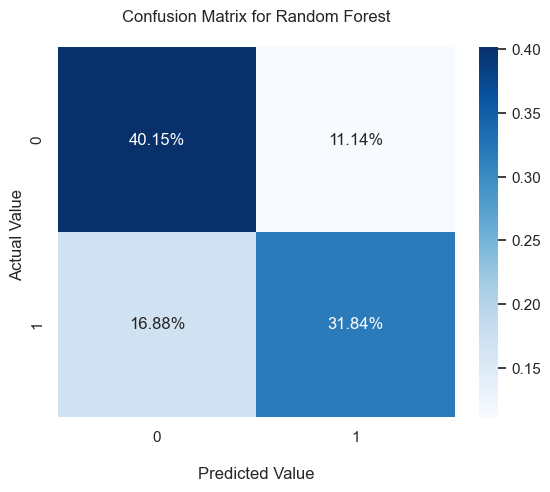

In [65]:
y_pred_df = best.predict(test)

#Get the confusion matrix 
cf_matrix = confusion_matrix(target_test, y_pred_df)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n')
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ')

## Display the visualization of the Confusion Matrix.
plt.show()

In [66]:
import pickle

# Save the model
with open(' best_rf.pkl', 'wb') as file:
    pickle.dump(best, file)


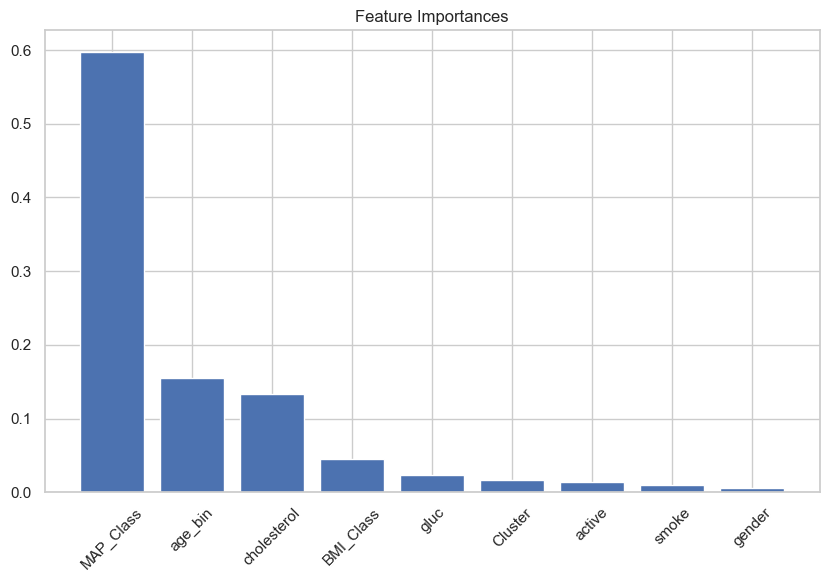

In [68]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming you have your training data X_train and labels y_train
# Train a Random Forest model


# Get feature importances from the trained model
feature_importances = best.feature_importances_

# Get the names of the features (assuming X_train is a pandas DataFrame)
feature_names = Xtrain.columns

# Sort the features by importance in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=45)
plt.title("Feature Importances")
plt.show()
